In [116]:
import pandas as pd

In [117]:
jo = pd.read_csv("data/bios.csv")

In [118]:
jo["height_cm"].describe()

count    106651.000000
mean        176.333724
std          10.380282
min         127.000000
25%         170.000000
50%         176.000000
75%         183.000000
max         226.000000
Name: height_cm, dtype: float64

In [119]:
jo["born_date"] = pd.to_datetime(jo["born_date"])
jo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   athlete_id    145500 non-null  int64         
 1   name          145500 non-null  object        
 2   born_date     143693 non-null  datetime64[ns]
 3   born_city     110908 non-null  object        
 4   born_region   110908 non-null  object        
 5   born_country  110908 non-null  object        
 6   NOC           145499 non-null  object        
 7   height_cm     106651 non-null  float64       
 8   weight_kg     102070 non-null  float64       
 9   died_date     33940 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 11.1+ MB


In [120]:
jo["born_year"] = jo["born_date"].dt.year
jo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   athlete_id    145500 non-null  int64         
 1   name          145500 non-null  object        
 2   born_date     143693 non-null  datetime64[ns]
 3   born_city     110908 non-null  object        
 4   born_region   110908 non-null  object        
 5   born_country  110908 non-null  object        
 6   NOC           145499 non-null  object        
 7   height_cm     106651 non-null  float64       
 8   weight_kg     102070 non-null  float64       
 9   died_date     33940 non-null   object        
 10  born_year     143693 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 12.2+ MB


In [121]:
jo_sorted_born_year = jo.sort_values("born_year")

In [122]:
jo_sorted_born_year.dropna(subset="born_year", inplace=True)

In [123]:
born_year_counts = jo_sorted_born_year["born_year"].value_counts()

In [124]:
born_year_counts.sort_index(inplace=True)
born_year_counts

born_year
1828.0      1
1831.0      2
1833.0      1
1836.0      1
1837.0      1
         ... 
2005.0    163
2006.0     17
2007.0      3
2008.0      3
2009.0      1
Name: count, Length: 177, dtype: int64

In [125]:
!pip install matplotlib
!pip install numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [126]:
import numpy as np
import matplotlib.pyplot as plt

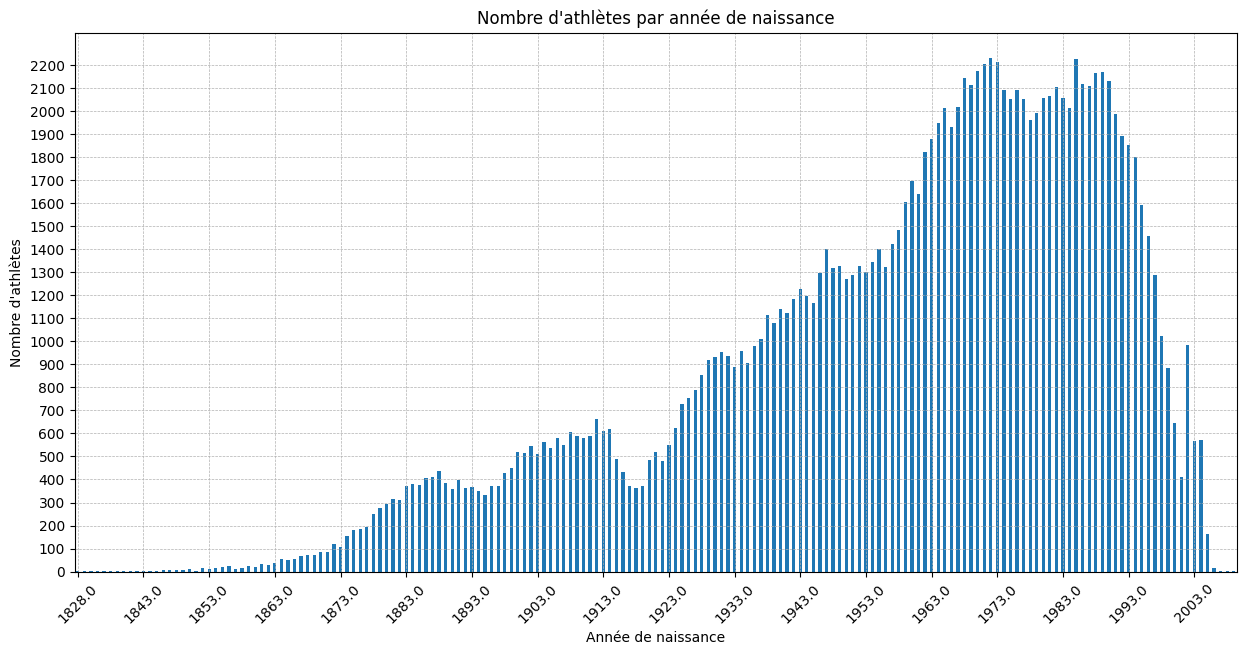

In [127]:
born_year_counts.plot(kind='bar', figsize=(15, 7))
plt.xlabel('Année de naissance')
plt.ylabel("Nombre d'athlètes")
plt.xticks(np.arange(0, len(born_year_counts), step=10), rotation=45)
plt.yticks(np.arange(0, born_year_counts.max(), step=100))
plt.grid(axis='both', linestyle='--', linewidth=0.5)
plt.title("Nombre d'athlètes par année de naissance")
plt.show()

<Axes: xlabel='decade'>

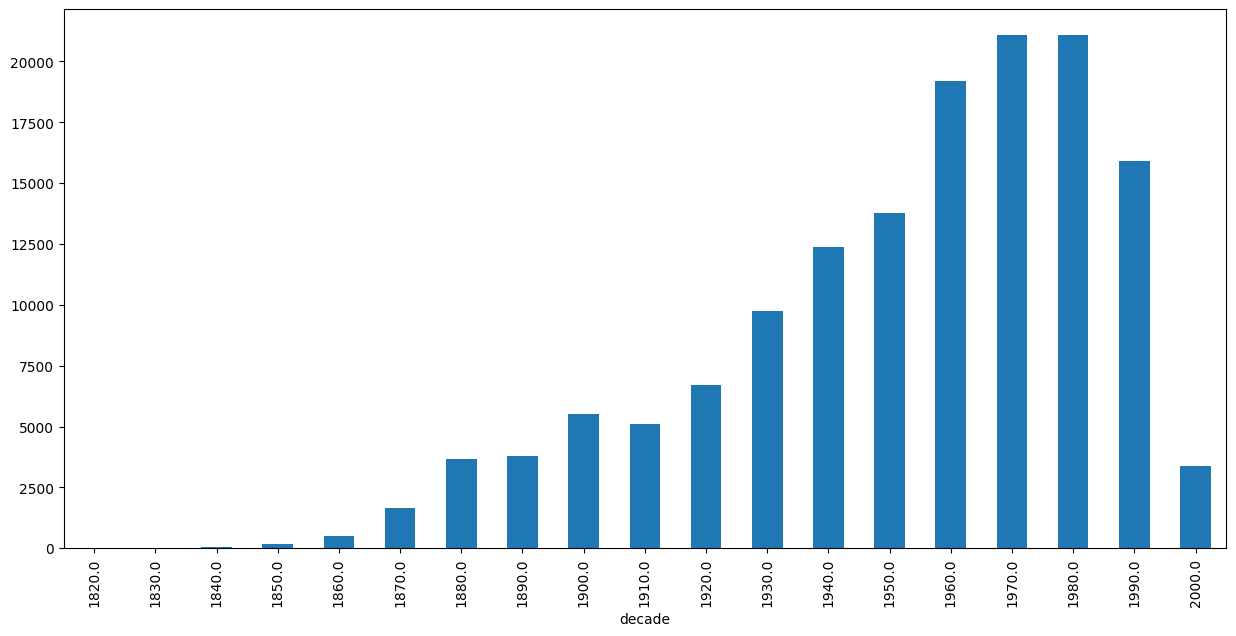

In [128]:
jo_sorted_born_year["decade"] = jo_sorted_born_year["born_year"] // 10 * 10
decade_counts = jo_sorted_born_year["decade"].value_counts()
decade_counts.sort_index(inplace=True)
decade_counts.plot(kind='bar', figsize=(15, 7))

In [129]:
jo_results = pd.read_csv("data/results.csv")
jo_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        305807 non-null  float64
 1   type        305807 non-null  object 
 2   discipline  308407 non-null  object 
 3   event       308408 non-null  object 
 4   as          308408 non-null  object 
 5   athlete_id  308408 non-null  int64  
 6   noc         308407 non-null  object 
 7   team        121714 non-null  object 
 8   place       283193 non-null  float64
 9   tied        308408 non-null  bool   
 10  medal       44139 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 23.8+ MB


In [130]:
jo_data = pd.merge(jo, jo_results, how="inner")

In [131]:
jo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   athlete_id    308408 non-null  int64         
 1   name          308408 non-null  object        
 2   born_date     305692 non-null  datetime64[ns]
 3   born_city     246890 non-null  object        
 4   born_region   246890 non-null  object        
 5   born_country  246890 non-null  object        
 6   NOC           308408 non-null  object        
 7   height_cm     236910 non-null  float64       
 8   weight_kg     227290 non-null  float64       
 9   died_date     73521 non-null   object        
 10  born_year     305692 non-null  float64       
 11  year          305807 non-null  float64       
 12  type          305807 non-null  object        
 13  discipline    308407 non-null  object        
 14  event         308408 non-null  object        
 15  as            308

In [132]:
jo_data[(jo_data["height_cm"] > 200) & (jo_data["medal"] == "Gold")]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,...,year,type,discipline,event,as,noc,team,place,tied,medal
8659,5101,Mihovil Nakić-Vojnović,1955-07-31,Drniš,Šibensko-kninska županija,CRO,Yugoslavia,204.0,95.0,NaN,...,1980.0,Summer,Basketball (Basketball),"Basketball, Men (Olympic)",Mihovil Nakić-Vojnović,YUG,Yugoslavia,1.0,False,Gold
8668,5108,Viktor Pankrashkin,1957-06-19,Moskva (Moscow),Moskva,RUS,Soviet Union,220.0,112.0,1993-07-24,...,1988.0,Summer,Basketball (Basketball),"Basketball, Men (Olympic)",Viktor Pankrashkin,URS,Soviet Union,1.0,False,Gold
8823,5216,Anne Donovan,1961-11-01,Ridgewood,New Jersey,USA,United States,203.0,62.0,2018-06-13,...,1984.0,Summer,Basketball (Basketball),"Basketball, Women (Olympic)",Anne Donovan,USA,United States,1.0,False,Gold
8824,5216,Anne Donovan,1961-11-01,Ridgewood,New Jersey,USA,United States,203.0,62.0,2018-06-13,...,1988.0,Summer,Basketball (Basketball),"Basketball, Women (Olympic)",Anne Donovan,USA,United States,1.0,False,Gold
9177,5470,Uļjana Semjonova,1952-03-09,Medumi,Daugavpils novads,LAT,Soviet Union,210.0,128.0,NaN,...,1976.0,Summer,Basketball (Basketball),"Basketball, Women (Olympic)",Uļjana Semjonova,URS,Soviet Union,1.0,False,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305931,147361,Bam Adebayo,1997-07-18,Newark,New Jersey,USA,United States,206.0,116.0,NaN,...,2020.0,Summer,Basketball (Basketball),"Basketball, Men (Olympic)",Bam Adebayo,USA,United States,1.0,False,Gold
305932,147362,Jerami Grant,1994-03-12,Portland,Oregon,USA,United States,203.0,95.0,NaN,...,2020.0,Summer,Basketball (Basketball),"Basketball, Men (Olympic)",Jerami Grant,USA,United States,1.0,False,Gold
305933,147363,Jayson Tatum,1998-03-03,NaN,NaN,NaN,United States,203.0,95.0,NaN,...,2020.0,Summer,Basketball (Basketball),"Basketball, Men (Olympic)",Jayson Tatum,USA,United States,1.0,False,Gold
305935,147365,Khris Middleton,1991-08-12,Charleston,South Carolina,USA,United States,201.0,101.0,NaN,...,2020.0,Summer,Basketball (Basketball),"Basketball, Men (Olympic)",Khris Middleton,USA,United States,1.0,False,Gold


In [133]:
basketball_data = jo_data[jo_data["discipline"].str.contains("Basketball", na=False)]
basketball_data["height_cm_rounded"] = basketball_data["height_cm"].round(-1)
basketball_data["height_cm"].mean()

C:\Users\aarnoux\AppData\Local\Temp\ipykernel_7140\3358987294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basketball_data["height_cm_rounded"] = basketball_data["height_cm"].round(-1)


np.float64(190.82055582175371)

In [134]:
gymnastics_data = jo_data[jo_data["discipline"].str.contains("Gymnastics", na=False)]
gymnastics_data["height_cm_rounded"] = gymnastics_data["height_cm"].round(-1)
gymnastics_data["height_cm"].mean()

C:\Users\aarnoux\AppData\Local\Temp\ipykernel_7140\719590289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gymnastics_data["height_cm_rounded"] = gymnastics_data["height_cm"].round(-1)


np.float64(163.15021459227466)

In [135]:
basketball_heights = basketball_data["height_cm_rounded"].value_counts().sort_index()
basketball_heights_maxed = basketball_heights / basketball_heights.max()

In [136]:
gymnastics_heights = gymnastics_data["height_cm_rounded"].value_counts().sort_index()
gymnastics_heights_maxed = gymnastics_heights / gymnastics_heights.max()

In [137]:
both_heights = pd.concat([basketball_heights_maxed, gymnastics_heights_maxed], axis=1).sort_index()
both_heights.columns = ["Basketball", "Gymnastics"]

<Figure size 1500x700 with 0 Axes>

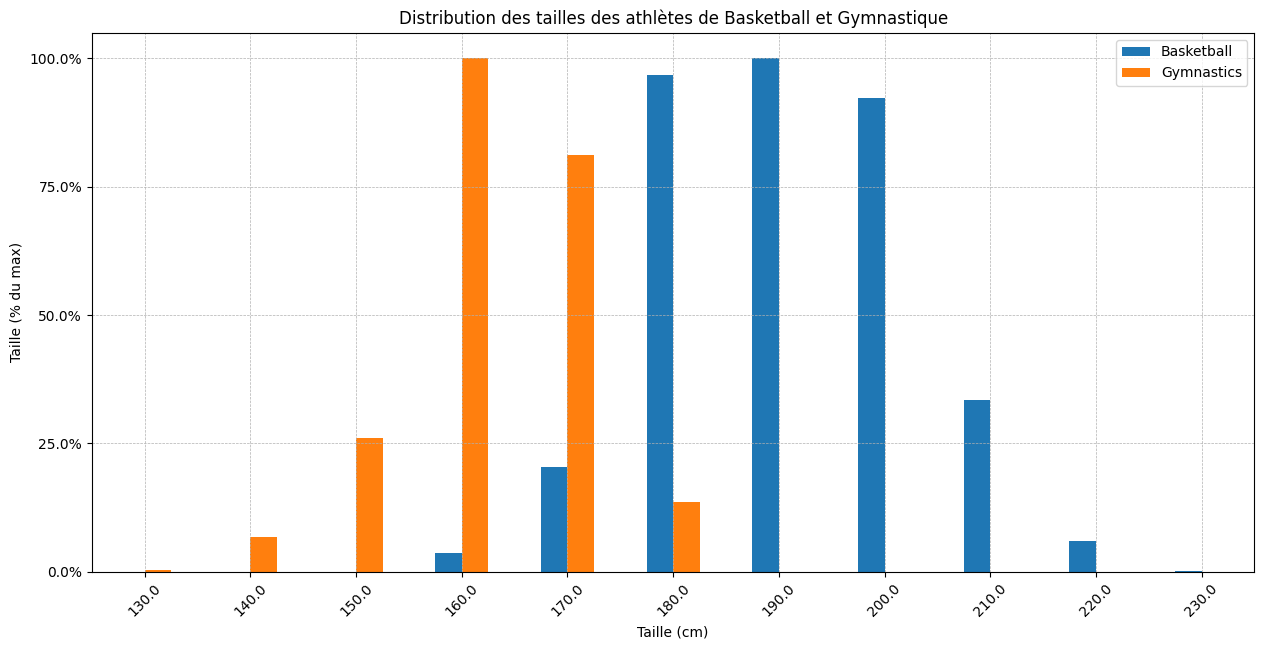

In [142]:
plt.figure(figsize=(15, 7))

both_heights.plot(kind='bar', figsize=(15, 7))
plt.xlabel('Taille (cm)')
plt.ylabel("Taille (% du max)")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1.1, step=0.25), labels=[f"{i * 100}%" for i in np.arange(0, 1.1, step=0.25)])
plt.grid(axis='both', linestyle='--', linewidth=0.5)


plt.legend()
plt.title("Distribution des tailles des athlètes de Basketball et Gymnastique")
plt.show()

In [162]:
tailles_moyennes_par_disciplines = jo_data.groupby("discipline")["height_cm"].median().sort_values()

In [166]:
tailles_moyennes_par_disciplines.dropna(inplace=True)

Text(0.5, 1.0, 'Taille médiane des athlètes par discipline')

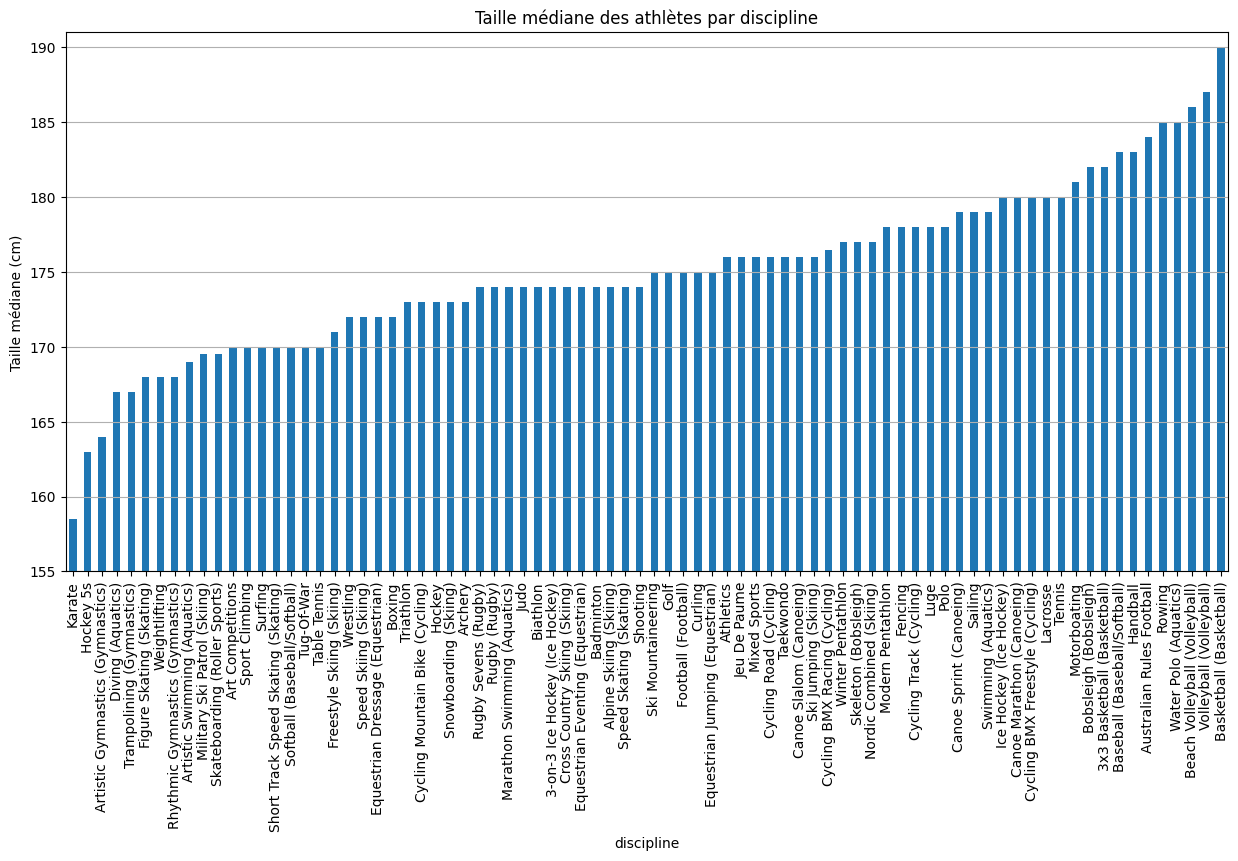

In [181]:
tailles_moyennes_par_disciplines.plot(kind='bar', figsize=(15, 7))
plt.ylim(155, max(tailles_moyennes_par_disciplines) + 1)
plt.ylabel("Taille médiane (cm)")
plt.grid(axis='y')
plt.title("Taille médiane des athlètes par discipline")

In [ ]:
top_5_tallest_disciplines = tailles_moyennes_par_disciplines.tail(5)
top_5_tallest_disciplines

Text(0.5, 1.0, 'Les 5 disciplines où les athlètes ont les plus grandes tailles médianes')

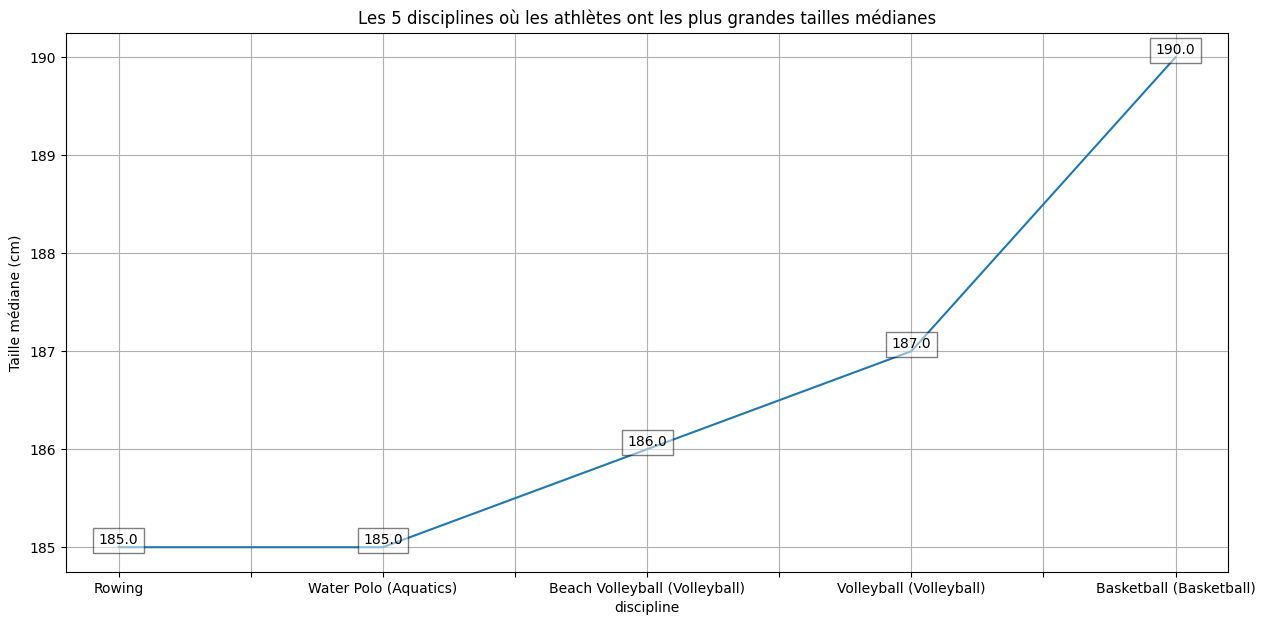

In [199]:
top_5_tallest_disciplines.plot(kind='line', figsize=(15, 7))
plt.ylabel("Taille médiane (cm)")
plt.grid(axis='both')

for i in range(top_5_tallest_disciplines.size):
    plt.text(i, top_5_tallest_disciplines.iloc[i], top_5_tallest_disciplines.iloc[i], ha='center', va='bottom',bbox=dict(facecolor='white', alpha=0.5))

plt.title("Les 5 disciplines où les athlètes ont les plus grandes tailles médianes")

In [203]:
top_5_smallest_disciplines = tailles_moyennes_par_disciplines.head(5).sort_values(ascending=False)
top_5_smallest_disciplines

discipline
Trampolining (Gymnastics)           167.0
Diving (Aquatics)                   167.0
Artistic Gymnastics (Gymnastics)    164.0
Hockey 5s                           163.0
Karate                              158.5
Name: height_cm, dtype: float64

Text(0.5, 1.0, 'Les 5 disciplines où les athlètes ont les plus petites tailles médianes')

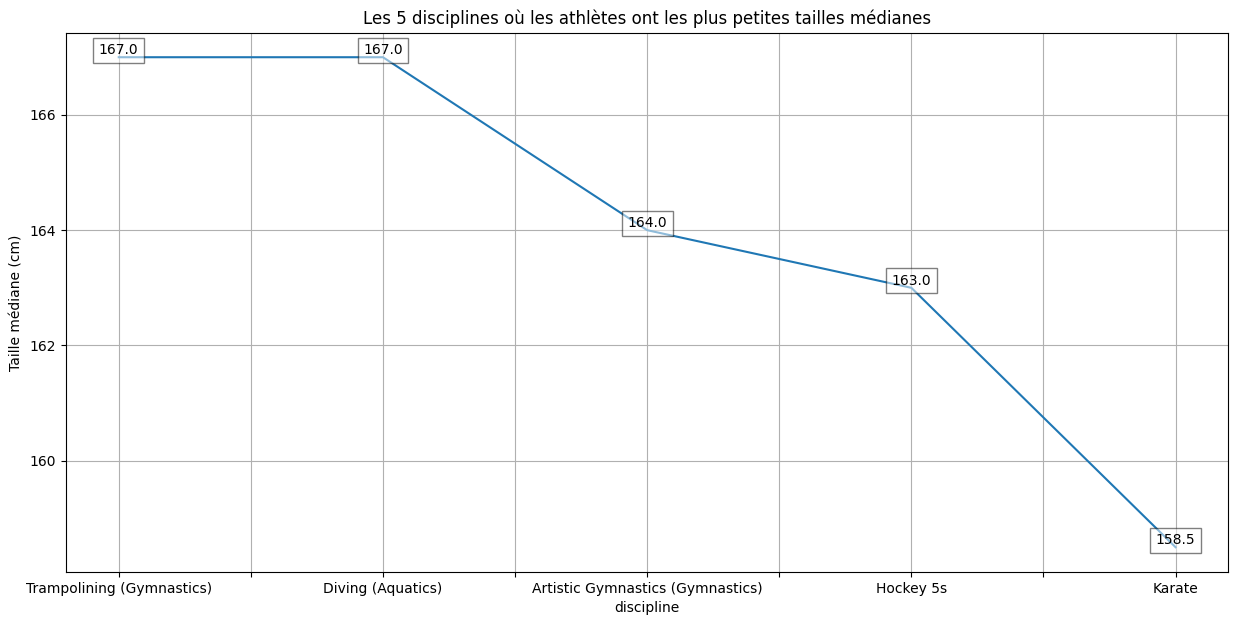

In [204]:
top_5_smallest_disciplines.plot(kind='line', figsize=(15, 7))
plt.ylabel("Taille médiane (cm)")
plt.grid(axis='both')

for i in range(top_5_smallest_disciplines.size):
    plt.text(i, top_5_smallest_disciplines.iloc[i], top_5_smallest_disciplines.iloc[i], ha='center', va='bottom',bbox=dict(facecolor='white', alpha=0.5))

plt.title("Les 5 disciplines où les athlètes ont les plus petites tailles médianes")